# Can **you** break computer vision models?

## Problem Description

AlexNet's victory in the 2012 ImageNet Challenge marked a pivotal moment in the field of deep learning. This groundbreaking neural network, designed by Alex Krizhevsky, Ilya Sutskever, and Geoffrey Hinton, dramatically outperformed its competitors with a top-5 test error rate of 15.3%, compared to the 26.2% achieved by the second-best entry. This success highlighted the untapped potential of deep learning, particularly in convolutional neural networks (CNNs), for image recognition tasks.


Only a few years after AlexNet, CNNs surpassed humans at recognizing images! 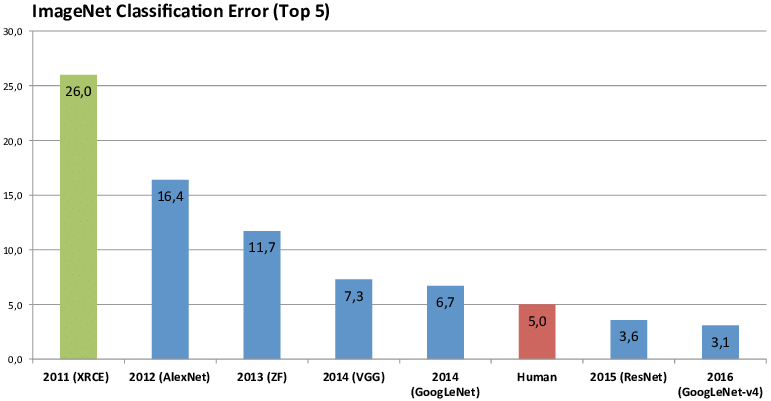

...or, more precisely, CNNs became better than humans at solving the ImageNet Challenge.

Not even two years after the 2012 ImageNet Challenge,
[Szegedy et al.](https://arxiv.org/abs/1312.6199) discovered a surprising twist to our understanding of CNNs, which were surpassing human performance in image recognition: CNNs could be easily fooled by very minor perturbations of the input images.

In particular, they found that CNNs can be misled by "adversarial examples." These are subtly perturbed images, indistinguishable to the human eye, that cause the CNN to misidentify what it sees. For instance, a slightly modified image of a cat might be wrongly classified (see example below, where the labels denote the predictions of a CNN). This reveals a unique vulnerability in how CNNs interpret visual information, despite their sophistication in pattern recognition. 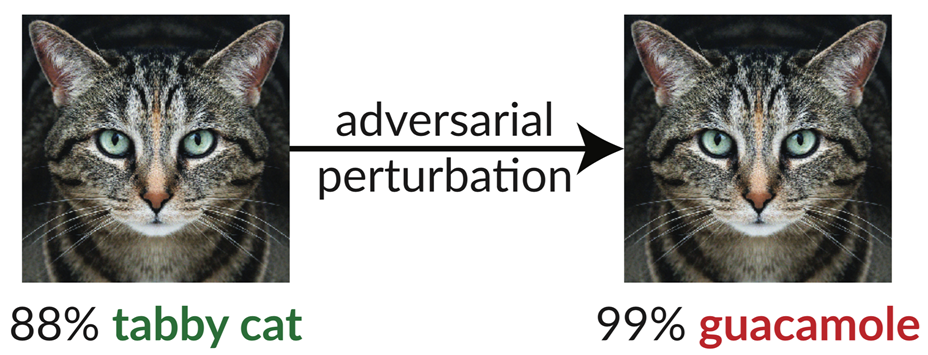



It turns out that we can find adversarial perturbations as the one above using (roughly) the same algorithm we use to train the CNN---gradient descent! Unlike standard gradient descent, which optimizes neural network parameters, we will apply gradient *ascent* in the *input* space. The intuition is that we want to change the input such that it maximizes the network's loss.

But how the we ensure that the perturbation remains "minor" and invisible to the human eye? One simple way to do so is to ensure that the perturbed image is "close" to the original one. One way to formalize this notion is to ask that the [Euclidean](https://en.wikipedia.org/wiki/Euclidean_distance) (also known as $\ell_2$) distance between the two images is small.

It turns out that we need to make only a small modifcation to the gradient ascent algorithm to fulfill the above $\ell_2$ constraint: after every gradient step, we simply move the image back to being "close". Formally speaking, we project the image onto an $\ell_2$ ball centered around the original image. This modified algorithm is known as *projected* gradient descent/ascent. Check out this [tutorial](https://adversarial-ml-tutorial.org/adversarial_examples/) for a more detailed overview.

In this problem, you will train a CNN model and make your best effort to break it! Let's start with training one of those CNNs ourselves. We're going to use a much smaller dataset called CIFAR-10.

## Task 1: Train a ResNet-18 on the CIFAR-10 dataset using PyTorch

Your task is to develop a deep learning model using the ResNet-18 architecture and train it on the CIFAR-10 dataset using the PyTorch library.

###Background and Definitions

1. **ResNet-18**: ResNet, short for Residual Networks, is a type of CNN that is known for its deep network architecture. ResNet-18 is a variant with 18 layers. It is distinguished by its use of skip connections or shortcuts to jump over some layers, which helps in alleviating the vanishing gradient problem in deep networks. ResNet architectures have shown significant effectiveness in image classification tasks.

2. **CIFAR-10 Dataset**: The CIFAR-10 dataset consists of 60,000 32x32 color images in 10 different classes, with 6,000 images per class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes include objects like airplanes, cars, birds, cats, etc., and are commonly used for training and evaluating image recognition algorithms.

3. **PyTorch**: PyTorch is an open-source machine learning library, widely used for applications such as computer vision and natural language processing. It is known for its flexibility, ease of use, and dynamic computational graph that allows for easy and efficient model building and training.

###Task Requirements

1. Load and preprocess the CIFAR-10 dataset.
2. Use the provided ResNet-18 model below and train it on the CIFAR-10 training dataset.
3. Evaluate the model performance on the CIFAR-10 test dataset.

### Deliverables

* Python code implementing the training process.
* A short report of up to 200 words describing the design choices for the training process, as well as train and test accuracy of the trained model.

Check out [this tutorial](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html) for a starting point if you are stuck.

In [ ]:
from torchvision.models import resnet18

In [ ]:
# Your code here
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
#load cifar-10
#applies data augmentation
transform = transforms.Compose(
    [transforms.ToTensor(),
     #thanks chatgpt
     transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616)),
     transforms.RandomAffine(degrees = (-5, 5), translate = (0.1, 0.1), scale = (1, 1), )
     ])

testtransform = transforms.Compose(
    [transforms.ToTensor(),
     #thanks chatgpt
     transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))
     ])

#a batch_size of 4 caused massive overhead and slowdown
#so I increased it
batch_size = 100

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=testtransform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170498071/170498071 [00:05<00:00, 33473218.77it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


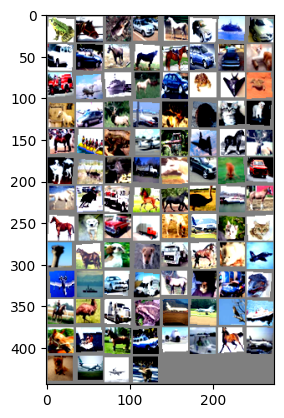

frog  horse frog  car   horse car   ship  car   car   car   horse horse horse car   car   cat   truck plane ship  horse car   frog  plane frog  horse car   deer  plane deer  cat   cat   dog   horse ship  frog  plane truck plane horse deer  dog   deer  frog  truck horse car   deer  car   horse horse truck horse horse bird  ship  horse horse dog   car   truck dog   plane cat   cat   bird  horse dog   dog   truck horse cat   plane plane ship  car   truck deer  cat   car   bird  horse bird  truck frog  plane plane bird  ship  horse ship  horse car   plane ship  horse plane dog   plane plane deer 


In [ ]:
#show images
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images, nrow=8))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [ ]:
#define loss and optimizer
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

net = resnet18(num_classes=10).cuda()
criterion = nn.CrossEntropyLoss().cuda()
optimizer = optim.Adam(net.parameters(), lr=0.001)
#optimizer = optim.SGD(net.parameters(), lr=0.002, momentum=0.9)
#scheduler = optim.lr_scheduler.ExponentialLR(optimizer, 0.9)

In [ ]:
retrain_model = False

In [ ]:
if (retrain_model):
    printinterval = 16000 / batch_size
    criterion = criterion.cuda()
    net = net.cuda()
    high_count = 0
    #training
    for epoch in range(20):  # loop over the dataset multiple times

        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            inputs = inputs.cuda()
            labels = labels.cuda()

            with torch.device("cuda"):

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward + backward + optimize
                outputs = net(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

                running_loss += loss.item()

            # print statistics
            if i % printinterval == printinterval-1:    # print every printinterval mini-batches
                print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / printinterval:.3f}')
                running_loss = 0.0

                correct = 0
                total = 0
                with torch.no_grad():
                    for i, data in enumerate(testloader, 0):
                        images, labels = data

                        images = images.cuda()
                        labels = labels.cuda()

                        with torch.device("cuda"):

                            # calculate outputs by running images through the network
                            outputs = net(images)
                            # the class with the highest energy is what we choose as prediction
                            _, predicted = torch.max(outputs.data, 1)
                            total += labels.size(0)
                            correct += (predicted == labels).sum().item()
                        if (i == 1):
                            break

                print(f'Accuracy of the network on test images: {100 * correct / total :.2f} %')
                if (correct / total >= 0.86):
                    high_count += 1
        if (high_count >= 2):
            break

        #scheduler.step()

    print('Finished Training')

In [ ]:
PATH = 'cifar_net.pth'

In [ ]:
if (not retrain_model):
    net.load_state_dict(torch.load(PATH))

In [ ]:
torch.save(net.state_dict(), PATH)

In [ ]:
net = net.cpu()

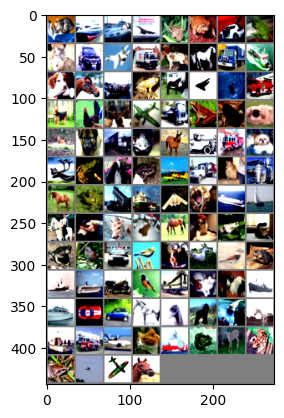

GroundTruth:  cat   ship  ship  plane


In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [ ]:
outputs = net(images)

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  dog   ship  ship  plane


In [ ]:
correct = 0
total = 0
criterion = criterion.cuda()
net = net.cuda()
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data

        images = images.cuda()
        labels = labels.cuda()

        with torch.device("cuda"):

            # calculate outputs by running images through the network
            outputs = net(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total :.2f} %')

Accuracy of the network on the 10000 test images: 80.28 %


##By Legolas

Dataset:

I use the CIFAR-10 dataset to train the ResNet-18 model. Minor data augmentation, such as rotation and scaling, was applied to improve model generalization and accuracy. Without data augmentation, the model was unable to get accuracies above 80%.

Training:

A batch size of 100 was used to prevent excessive overhead while allowing the model to train well. At the beginning, I used a batch size of 4, but that lead to slow training times. Higher values like 4000 would prevent the model from gaining accuracy during training due to a lower number of optimizer steps. With my good instinct of numbers, I experimented with various batch sizes. I eventually settled on a batch size of 100 for optimal accuracy and performance. The model was trained for 20 epochs to provide enough training time for convergance. I used CrossEntropyLoss as the loss function and an Adam optimizer.

Evaluation:

A small amount of testing data was used during the training process to approximate the model accuracy at each measured point in training. This allowed me to gain insight into the model's performance, which let me change the hyperparameters and training strategies as necessary.

## Task 2: Create adversarial examples for your trained model

Build upon your previously trained ResNet-18 model on the CIFAR-10 dataset by generating **$\ell_\infty$** adversarial examples to test the model's robustness, as covered in today's class. You may use any library of your choice available online or develop the method from scratch.

###Task Requirements

1. **$\varepsilon$ Values**: Use a $\ell_\infty$ ball of radius $8/255$ (eg. each pixel can only change by a value of $8/255$)

2. **Generate Adversarial Examples**: Modify all **test** images from the CIFAR-10 dataset using your adversarial attack.

3. **Test Model Accuracy**: Evaluate the accuracy of your ResNet-18 model on these adversarially modified images.

###Deliverables

* Python code used for generating adversarial examples and testing the model.
* A short (~1 paragraph) report describing your approach.

In [ ]:
# Your code here

#enforce distance rule
def clampdistance(image, magnitude, original = None):
    retval = torch.tensor(())
    retval = image.new_zeros(image.size())
    if (original == None):
        # for i in range(image.size()[0]):
        #     deltatensor = image[i].clone().detach()
        #     deltatensor = deltatensor.clamp(min = -magnitude, max = magnitude)
        #     retval[i] = deltatensor
        deltatensor = image.clamp(min = -magnitude, max = magnitude)
        retval = deltatensor
    else:
        # for i in range(image.size()[0]):
        #     deltatensor = image[i] - original[i]
        #     deltatensor = deltatensor.clamp(min = -magnitude, max = magnitude)
        #     retval[i] = original[i].add(deltatensor)
        deltatensor = image - original
        deltatensor = deltatensor.clamp(min = -magnitude, max = magnitude)
        retval = original.add(deltatensor)
    return retval

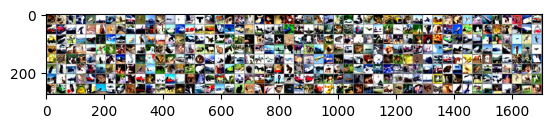

GroundTruth:  frog  frog  cat   bird  frog  car   ship  bird  car   frog  ship  frog  ship  plane deer  plane horse horse dog   dog   cat   dog   bird  cat   deer  car   horse dog   deer  frog  car   truck cat   frog  frog  truck cat   ship  plane horse bird  frog  bird  dog   ship  dog   deer  frog  ship  truck truck car   plane bird  bird  horse cat   bird  ship  plane truck dog   ship  car   truck deer  car   cat   ship  car   deer  horse truck deer  bird  horse plane horse plane frog  frog  truck plane truck bird  ship  horse bird  bird  dog   car   bird  frog  bird  truck frog  bird  cat   plane cat   truck ship  horse ship  ship  deer  plane car   ship  bird  horse truck cat   frog  car   truck plane horse cat   horse deer  dog   plane plane bird  truck cat   deer  plane frog  bird  dog   cat   horse cat   horse bird  dog   cat   car   car   deer  truck truck dog   horse dog   plane bird  bird  bird  truck horse cat   truck deer  cat   dog   deer  frog  dog   frog  car   deer  ca

In [ ]:
#scoop some new images
dataiter = iter(testloader)
for i in range(3):
    next(dataiter)
imageslist = []
labelslist = []
for i in range(4):
    a, b = next(dataiter)
    imageslist.append(a)
    labelslist.append(b)
images = torch.cat(imageslist)
labels = torch.cat(labelslist)
#images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images, nrow = 50))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(len(labels))))

In [ ]:
#measure unpeturbed prediction of images
net.cpu()
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(len(labels))))

Predicted:  frog  frog  cat   bird  frog  car   ship  bird  truck deer  ship  frog  ship  dog   deer  plane horse horse dog   dog   cat   deer  bird  bird  horse deer  horse dog   deer  frog  car   truck frog  frog  frog  truck cat   ship  plane car   cat   frog  bird  cat   ship  dog   deer  frog  ship  truck truck car   ship  bird  bird  horse dog   bird  ship  plane truck dog   ship  ship  truck deer  car   cat   plane car   bird  horse truck deer  bird  horse plane horse ship  frog  frog  truck plane car   dog   plane horse cat   bird  dog   car   bird  frog  bird  truck frog  bird  cat   plane truck truck car   horse ship  ship  frog  plane car   ship  bird  horse truck dog   frog  car   truck plane horse cat   horse deer  deer  ship  plane bird  truck frog  deer  frog  frog  deer  dog   cat   cat   cat   horse bird  dog   dog   truck car   deer  truck ship  dog   horse dog   plane bird  plane bird  truck horse cat   truck bird  deer  horse cat   ship  dog   frog  car   deer  cat 

In [ ]:
#measure accuracy of prediction
correct = 0
for x in range(len(labels)):
    if (predicted[x] == labels[x]):
        correct += 1
print(f"Percent correct: {correct/len(labels) * 100:.1f}%")

Percent correct: 80.2%


In [ ]:
#set up loss and optimizer
originalimages = images.clone().detach()
#originalimages.requires_grad_(True)
imagecriterion = nn.CrossEntropyLoss()

In [ ]:
#measure initial loss
outputs = net(images)
loss = imagecriterion(outputs, labels)
print(f"{loss.item():.3f}")

0.574


In [ ]:
imagecriterion = imagecriterion.cuda()
net = net.cuda()
images = images.cuda()
originalimages = originalimages.cuda()
labels = labels.cuda()
images.requires_grad_(True)
imageoptimizer = optim.Adam([images], lr=0.01, maximize = True)
printinterval = 100
running_loss = 0.0
#train images
for epoch in range(800):

    with torch.device("cuda"):
        imageoptimizer.zero_grad()

        outputs = net(images)
        loss = imagecriterion(outputs, labels)
        loss.backward()
        running_loss += loss.item()
        imageoptimizer.step()

        images.requires_grad_(False)
        #enforce the l-inf distance rule
        #so that pixels cannot change by more than 8/255
        images = clampdistance(images, 8/255, originalimages)
        images.requires_grad_(True)
        imageoptimizer = optim.Adam([images], lr=0.01, maximize = True)

    if (epoch % printinterval == printinterval - 1):
        print(f"[{epoch + 1}] loss: {running_loss / printinterval:.3f}")
        running_loss = 0

print("Finished Training")

[100] loss: 3.572
[200] loss: 3.690
[300] loss: 3.695
[400] loss: 3.699
[500] loss: 3.700
[600] loss: 3.701
[700] loss: 3.702
[800] loss: 3.702
Finished Training


In [ ]:
#measure post-training loss
outputs = net(images)
loss = imagecriterion(outputs, labels)
print(f"{loss.item():.3f}")

3.702


In [ ]:
#measure peturbed prediction of images
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(len(labels))))

Predicted:  frog  frog  dog   plane frog  ship  truck frog  truck deer  car   frog  plane dog   truck plane dog   horse dog   deer  dog   deer  frog  bird  horse deer  dog   horse cat   cat   car   truck frog  frog  frog  truck cat   ship  plane car   deer  frog  plane bird  plane dog   horse cat   ship  truck truck truck ship  bird  deer  cat   dog   cat   ship  plane truck horse ship  ship  truck bird  car   frog  plane car   bird  horse truck ship  bird  horse plane truck ship  frog  frog  ship  plane car   dog   plane deer  dog   dog   horse car   plane frog  dog   truck deer  deer  plane truck truck truck car   deer  ship  ship  frog  plane ship  ship  cat   horse ship  bird  frog  truck truck dog   dog   dog   horse frog  deer  ship  plane deer  truck frog  dog   frog  frog  deer  cat   dog   cat   truck horse deer  frog  dog   truck truck bird  truck ship  cat   horse deer  plane bird  plane bird  ship  dog   dog   truck bird  deer  horse cat   ship  dog   frog  car   horse hors

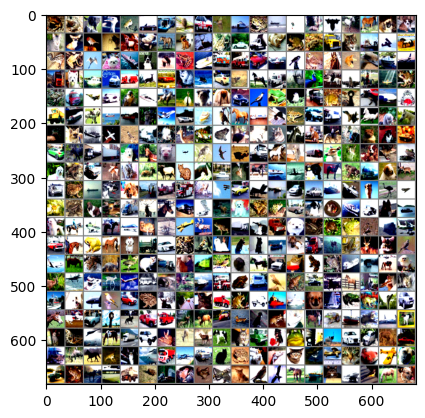

GroundTruth:  frog  frog  cat   bird  frog  car   ship  bird  car   frog  ship  frog  ship  plane deer  plane horse horse dog   dog   cat   dog   bird  cat   deer  car   horse dog   deer  frog  car   truck cat   frog  frog  truck cat   ship  plane horse bird  frog  bird  dog   ship  dog   deer  frog  ship  truck truck car   plane bird  bird  horse cat   bird  ship  plane truck dog   ship  car   truck deer  car   cat   ship  car   deer  horse truck deer  bird  horse plane horse plane frog  frog  truck plane truck bird  ship  horse bird  bird  dog   car   bird  frog  bird  truck frog  bird  cat   plane cat   truck ship  horse ship  ship  deer  plane car   ship  bird  horse truck cat   frog  car   truck plane horse cat   horse deer  dog   plane plane bird  truck cat   deer  plane frog  bird  dog   cat   horse cat   horse bird  dog   cat   car   car   deer  truck truck dog   horse dog   plane bird  bird  bird  truck horse cat   truck deer  cat   dog   deer  frog  dog   frog  car   deer  ca

In [ ]:
# print images
images = images.cpu()
imshow(torchvision.utils.make_grid(images, nrow = 20))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(len(labels))))

In [ ]:
#measure accuracy of prediction
correct = 0
for x in range(len(labels)):
    if (predicted[x] == labels[x]):
        correct += 1
print(f"Percent correct: {correct/len(labels) * 100:.1f}%")

Percent correct: 38.8%


In [ ]:
#save the image
torch.save(images, "adv_images1.pth")

##By Legolas

To create adversarial examples, I simply used an Adam optimizer set to the image with maximise = True. I designed my algorithm based on clamping function own clamping function so I could clamp an image relative to the original image, though the function would work to clamp a noise image. The algorithm worked by finding the delta, clamping the delta, and adding the delta back to the original image.  I measured the loss and accuracy before and after the image was trained. The accuracy of the model on the peturbed images was lowered from 80.2% to 38.8%.

I am aware of other functions that could do the similar job , such as clipping function like torch.max and torch.min and torch.where, but  I believe my solution is sufficient for the goal.

My reflection: There is the possibility of creating adversarial images, and then putting them in a new training set to retrain the model with. Eventually, the model would learn to recognize the adversarial image, making it more robust. This process could be repeated with new adversarial images to continue making the model stronger against adversarial attacks, leading to an arms race. So, I feel this final challenge is very interesting. It proves that there is no limit in the learning of the data model, and ourselves.

## Bonus Task: Customize your attack

Now that you've seen how easy is to fool a CNN, let's try making some modification to the attack.
One possible concern with our perturbations is that they may not be that imperceptible for humans. For example, they could pertrub the foreground of the image in a (slightly) noticeable way.
To address that, let's employ a simple heuristic: let's assume the foreground, i.e., main object, is always in the center of the image. Let's try to capitalize on this idea and design an attack that perturbs the center of the image a lot less than the rest.

Your task is to build upon your previously trained ResNet-18 model on the CIFAR-10 dataset by generating custom $\ell_\infty$ adversarial examples to test the model's robustness. You may use any library of your choice available online or develop the method from scratch.

###Task Requirements

1. **$\varepsilon$ Values**: Use the following values for the radius $\varepsilon$ of the $\ell_\infty$ ball onto which we project the adversarial examples: $2/255$ for the center $16\times 16$ pixels of the image, and $8/255$ for the rest.

2. **Generate Adversarial Examples**: Modify all test images from the CIFAR-10 dataset using your custom adversarial attack.

3. **Test Model Accuracy**: Evaluate the accuracy of your ResNet-18 model on these adversarially modified images.

###Deliverables

* Python code used for generating the custom adversarial examples and testing the model.
* A short (~1 paragraph) report describing your approach.

In [ ]:
# Your code here

centerones = torch.tensor(())
centerones = centerones.new_zeros((3, 32, 32))
for c in range(3):
    for x in range(8, 8+16):
        for y in range(8, 8+16):
            centerones[c][x][y] = 1
centerzeros = torch.tensor(())
centerzeros = centerzeros.new_ones((3, 32, 32))
centerzeros = centerzeros.sub(centerones)

#all that's needed to change is the clamping function
#enforce distance rule
def clampdistance2(image, magnitude1, magnitude2, original = None):
    retval = torch.tensor(())
    retval = retval.new_zeros(image.size())
    if (original == None):
        # for i in range(image.size()[0]):
        #     deltatensor = image[i].clone().detach()
        #     deltacenter = deltatensor.mul(centerones).clamp(min = -magnitude1, max = magnitude1)
        #     deltaouter = deltatensor.mul(centerzeros).clamp(min = -magnitude2, max = magnitude2)
        #     retval[i] = deltacenter.add(deltaouter)
        deltatensor = image
        deltacenter = deltatensor.mul(centerones).clamp(min = -magnitude1, max = magnitude1)
        deltaouter = deltatensor.mul(centerzeros).clamp(min = -magnitude2, max = magnitude2)
        retval = deltacenter.add(deltaouter)
    else:
        # for i in range(image.size()[0]):
        #     deltatensor = image[i] - original[i]
        #     deltacenter = deltatensor.mul(centerones).clamp(min = -magnitude1, max = magnitude1)
        #     deltaouter = deltatensor.mul(centerzeros).clamp(min = -magnitude2, max = magnitude2)
        #     retval[i] = original[i].add(deltacenter).add(deltaouter)
        deltatensor = image - original
        deltacenter = deltatensor.mul(centerones).clamp(min = -magnitude1, max = magnitude1)
        deltaouter = deltatensor.mul(centerzeros).clamp(min = -magnitude2, max = magnitude2)
        retval = original.add(deltacenter).add(deltaouter)
    return retval

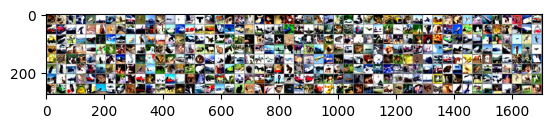

GroundTruth:  frog  frog  cat   bird  frog  car   ship  bird  car   frog  ship  frog  ship  plane deer  plane horse horse dog   dog   cat   dog   bird  cat   deer  car   horse dog   deer  frog  car   truck cat   frog  frog  truck cat   ship  plane horse bird  frog  bird  dog   ship  dog   deer  frog  ship  truck truck car   plane bird  bird  horse cat   bird  ship  plane truck dog   ship  car   truck deer  car   cat   ship  car   deer  horse truck deer  bird  horse plane horse plane frog  frog  truck plane truck bird  ship  horse bird  bird  dog   car   bird  frog  bird  truck frog  bird  cat   plane cat   truck ship  horse ship  ship  deer  plane car   ship  bird  horse truck cat   frog  car   truck plane horse cat   horse deer  dog   plane plane bird  truck cat   deer  plane frog  bird  dog   cat   horse cat   horse bird  dog   cat   car   car   deer  truck truck dog   horse dog   plane bird  bird  bird  truck horse cat   truck deer  cat   dog   deer  frog  dog   frog  car   deer  ca

In [ ]:
#scoop some new images
dataiter = iter(testloader)
for i in range(3):
    next(dataiter)
imageslist = []
labelslist = []
for i in range(4):
    a, b = next(dataiter)
    imageslist.append(a)
    labelslist.append(b)
images = torch.cat(imageslist)
labels = torch.cat(labelslist)
#images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images, nrow = 50))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(len(labels))))

In [ ]:
#measure unpeturbed prediction of images
net.cpu()
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(len(labels))))

Predicted:  frog  frog  cat   bird  frog  car   ship  bird  truck deer  ship  frog  ship  dog   deer  plane horse horse dog   dog   cat   deer  bird  bird  horse deer  horse dog   deer  frog  car   truck frog  frog  frog  truck cat   ship  plane car   cat   frog  bird  cat   ship  dog   deer  frog  ship  truck truck car   ship  bird  bird  horse dog   bird  ship  plane truck dog   ship  ship  truck deer  car   cat   plane car   bird  horse truck deer  bird  horse plane horse ship  frog  frog  truck plane car   dog   plane horse cat   bird  dog   car   bird  frog  bird  truck frog  bird  cat   plane truck truck car   horse ship  ship  frog  plane car   ship  bird  horse truck dog   frog  car   truck plane horse cat   horse deer  deer  ship  plane bird  truck frog  deer  frog  frog  deer  dog   cat   cat   cat   horse bird  dog   dog   truck car   deer  truck ship  dog   horse dog   plane bird  plane bird  truck horse cat   truck bird  deer  horse cat   ship  dog   frog  car   deer  cat 

In [ ]:
#measure accuracy of prediction
correct = 0
for x in range(len(labels)):
    if (predicted[x] == labels[x]):
        correct += 1
print(f"Percent correct: {correct/len(labels) * 100:.1f}%")

Percent correct: 80.2%


In [ ]:
#set up loss and optimizer
originalimages = images.clone().detach()
#originalimages.requires_grad_(True)
imagecriterion = nn.CrossEntropyLoss()

In [ ]:
#measure initial loss
outputs = net(images)
loss = imagecriterion(outputs, labels)
print(f"{loss.item():.3f}")

0.574


In [ ]:
centerones = centerones.cuda()
centerzeros = centerzeros.cuda()

imagecriterion = imagecriterion.cuda()
net = net.cuda()
images = images.cuda()
originalimages = originalimages.cuda()
labels = labels.cuda()
images.requires_grad_(True)
imageoptimizer = optim.Adam([images], lr=0.01, maximize = True)
printinterval = 100
running_loss = 0.0
#train images
for epoch in range(800):

    with torch.device("cuda"):
        imageoptimizer.zero_grad()

        outputs = net(images)
        loss = imagecriterion(outputs, labels)
        loss.backward()
        running_loss += loss.item()
        imageoptimizer.step()

        images.requires_grad_(False)
        images = clampdistance2(images, 2/255, 8/255, originalimages)
        #clampdistance(images, 8/255, originalimages)
        images.requires_grad_(True)
        imageoptimizer = optim.Adam([images], lr=0.01, maximize = True)

    if (epoch % printinterval == printinterval - 1):
        print(f"[{epoch + 1}] loss: {running_loss / printinterval:.3f}")
        running_loss = 0

print("Finished Training")

[100] loss: 2.492
[200] loss: 2.492
[300] loss: 2.493
[400] loss: 2.493
[500] loss: 2.494
[600] loss: 2.494
[700] loss: 2.494
[800] loss: 2.494
Finished Training


In [ ]:
#measure post-training loss
outputs = net(images)
loss = imagecriterion(outputs, labels)
print(f"{loss.item():.3f}")

2.494


In [ ]:
#measure peturbed prediction of images
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(len(labels))))

Predicted:  frog  frog  dog   bird  frog  car   truck bird  truck deer  car   frog  plane dog   truck plane dog   horse dog   deer  cat   deer  frog  bird  horse deer  horse horse cat   frog  car   truck frog  frog  frog  truck cat   ship  plane car   deer  frog  plane bird  plane dog   horse frog  ship  truck truck truck ship  bird  deer  horse dog   cat   ship  plane truck dog   ship  ship  truck deer  car   frog  plane car   bird  horse truck ship  bird  horse plane truck ship  frog  frog  truck plane car   dog   plane deer  dog   dog   dog   car   plane frog  dog   truck frog  deer  plane plane truck truck car   deer  ship  ship  frog  plane ship  ship  cat   horse ship  bird  frog  truck truck dog   dog   dog   horse deer  deer  ship  plane deer  truck frog  cat   frog  frog  deer  cat   dog   cat   truck horse deer  dog   dog   truck car   bird  truck ship  dog   horse deer  plane bird  plane bird  truck dog   dog   truck bird  deer  horse cat   ship  dog   frog  car   horse hors

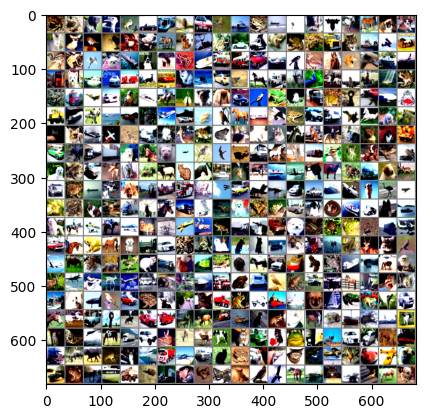

GroundTruth:  frog  frog  cat   bird  frog  car   ship  bird  car   frog  ship  frog  ship  plane deer  plane horse horse dog   dog   cat   dog   bird  cat   deer  car   horse dog   deer  frog  car   truck cat   frog  frog  truck cat   ship  plane horse bird  frog  bird  dog   ship  dog   deer  frog  ship  truck truck car   plane bird  bird  horse cat   bird  ship  plane truck dog   ship  car   truck deer  car   cat   ship  car   deer  horse truck deer  bird  horse plane horse plane frog  frog  truck plane truck bird  ship  horse bird  bird  dog   car   bird  frog  bird  truck frog  bird  cat   plane cat   truck ship  horse ship  ship  deer  plane car   ship  bird  horse truck cat   frog  car   truck plane horse cat   horse deer  dog   plane plane bird  truck cat   deer  plane frog  bird  dog   cat   horse cat   horse bird  dog   cat   car   car   deer  truck truck dog   horse dog   plane bird  bird  bird  truck horse cat   truck deer  cat   dog   deer  frog  dog   frog  car   deer  ca

In [ ]:
# print images
images = images.cpu()
imshow(torchvision.utils.make_grid(images, nrow = 20))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(len(labels))))

In [ ]:
#measure accuracy of prediction
correct = 0
for x in range(len(labels)):
    if (predicted[x] == labels[x]):
        correct += 1
print(f"Percent correct: {correct/len(labels) * 100:.1f}%")

Percent correct: 51.2%


In [ ]:
#save the image
torch.save(images, "adv_images2.pth")

##By Legolas

To do the bonus problem, I improved the clamp image function further from the solution in task 2. The function splits the image into the center and outer regions, clamps them seperately, then adds them back together. The clamping is used to make the changes invisible to the human eye. The accuracy of the model on the peturbed images drops from 80.2% down to 51.2%.

# Rubric

This rubric is subject to change but should keep the following format:

Task 1: 10 points
*   Accuracy: 5 points is given if your model scores above 80%
*   Report: 3 points, based on design choices and report quality
*   Code style: 2 points, based on clean code and comments

Task 2: 10 points
*   Accuracy: 10 points - $\text{score}=\frac{15}{1+accuracy}-7.5$
*   Any errors in implementation will affect your score.

Bonus: 5 points
*   Correct implementation: 5 points